In [5]:
# Loading the IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 12s 1us/step


### Data pre-processing

In [21]:
# Preparing the data
import numpy as np

# Create an all-zero matrix of shape (len(sequences), dimension)
def vectorise_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

# Vectorise training data
x_train = vectorise_sequences(train_data)
# Vectorise testing data
x_test = vectorise_sequences(test_data)

In [28]:
# Vectorise labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data is ready to be fed into the network.

### Building the network

In [37]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model

In [38]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Validating your approach

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model

In [40]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5427 - accuracy: 0.7887 - val_loss: 0.4129 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3264 - accuracy: 0.8973 - val_loss: 0.3210 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2384 - accuracy: 0.9224 - val_loss: 0.2821 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1879 - accuracy: 0.9391 - val_loss: 0.3347 - val_accuracy: 0.8637
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1516 - accuracy: 0.9527 - val_loss: 0.2788 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1281 - accuracy: 0.9604 - val_loss: 0.2859 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.3031 - val_accuracy: 0.8847
Epoch 8/20
30/

In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot our training and validation loss

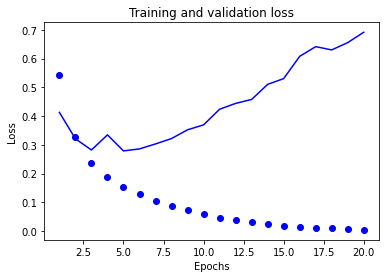

In [47]:
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validaiton loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Plotting the training and validation accuracy

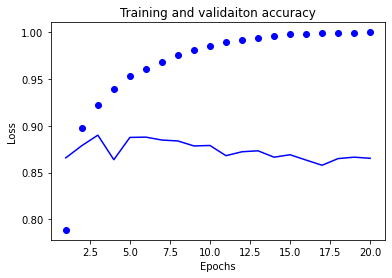

In [48]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validaiton acc')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()